# Heatmap from monthly timeseries

In [24]:
pip install seaborn cmcrameri

Note: you may need to restart the kernel to use updated packages.


In [26]:
import glob
import numpy as np
import xarray as xr
import seaborn as sns

import matplotlib.pyplot as plt
from cmcrameri import cm

In [3]:
lfiles = glob.glob('./data/*.netcdf')
lfiles

['./data/dataset_1950-1959_hourly_reanalysis-era5-land.netcdf',
 './data/dataset_1960-1969_hourly_reanalysis-era5-land.netcdf',
 './data/dataset_1970-1979_hourly_reanalysis-era5-land.netcdf',
 './data/dataset_1980-1989_hourly_reanalysis-era5-land.netcdf',
 './data/dataset_1990-1999_hourly_reanalysis-era5-land.netcdf',
 './data/dataset_2000-2009_hourly_reanalysis-era5-land.netcdf',
 './data/dataset_2021_hourly_reanalysis-era5-land.netcdf',
 './data/dataset_2010-2020_hourly_reanalysis-era5-land.netcdf']

In [4]:
dset = xr.open_mfdataset(lfiles)

In [5]:
dset

<xarray.Dataset>
Dimensions:    (longitude: 6, latitude: 6, time: 631151)
Coordinates:
  * longitude  (longitude) float32 72.5 72.6 72.7 72.8 72.9 73.0
  * latitude   (latitude) float32 19.25 19.15 19.05 18.95 18.85 18.75
  * time       (time) datetime64[ns] 1950-01-01T01:00:00 ... 2021-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(87647, 6, 6), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-27 02:49:28 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
dset_dmean = dset.resample(time='M').mean()

In [7]:
dset_dmean

<xarray.Dataset>
Dimensions:    (time: 864, longitude: 6, latitude: 6)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-31 1950-02-28 ... 2021-12-31
  * longitude  (longitude) float32 72.5 72.6 72.7 72.8 72.9 73.0
  * latitude   (latitude) float32 19.25 19.15 19.05 18.95 18.85 18.75
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(1, 6, 6), meta=np.ndarray>

In [8]:
dset_mean = dset_dmean.mean(("longitude", "latitude"))
dset_mean

<xarray.Dataset>
Dimensions:  (time: 864)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-31 1950-02-28 ... 2021-12-31
Data variables:
    t2m      (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>

## Create heatmap with temperature

In [39]:
df = dset_mean.to_dataframe()

In [40]:
df.head()

,t2m
time,
1950-01-31,297.199554
1950-02-28,295.687836
1950-03-31,298.381073
1950-04-30,300.773926
1950-05-31,301.310333


In [41]:
df['year'] = df.index.year
df['month'] = df.index.month_name().str[:3]
df['t2mC'] = df['t2m'] - 273.15
df.head(12)

,t2m,year,month,t2mC
time,,,,
1950-01-31,297.199554,1950,Jan,24.049561
1950-02-28,295.687836,1950,Feb,22.537842
1950-03-31,298.381073,1950,Mar,25.231079
1950-04-30,300.773926,1950,Apr,27.623932
1950-05-31,301.310333,1950,May,28.160339
1950-06-30,300.210663,1950,Jun,27.060669
1950-07-31,298.554321,1950,Jul,25.404327
1950-08-31,299.332703,1950,Aug,26.182709
1950-09-30,298.465546,1950,Sep,25.315552


In [52]:
dfp = df.pivot(index="month", columns="year", values="t2mC")

In [62]:
new_index = df['month'].to_numpy()[0:12]

In [66]:
dfp = dfp.reindex(new_index)

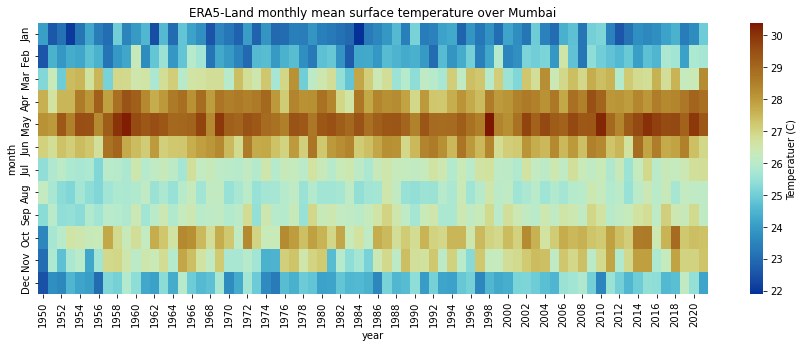

In [71]:
fig = plt.figure(1, figsize=[15,5])
plt.title('ERA5-Land monthly mean surface temperature over Mumbai')
ax = sns.heatmap(dfp, cmap=cm.roma_r, cbar_kws={'label': 'Temperatuer (C)'})
fig.savefig('heatmap.png')